<a href="https://colab.research.google.com/github/bogicho/FlyAI-5/blob/main/Day4_AI%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('labels:', labels)
print('encoder.classes:', encoder.classes_)
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))

labels: [0 1 5 4 2 3 2]
encoder.classes: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


#데이터 전처리
- 원핫인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 데이터로 변환해야함
items = np.array(items).reshape(-1, 1)

# One Hot Encoding 적용
ohe = OneHotEncoder()
ohe.fit(items)
oh_label = ohe.transform(items)

print(oh_label.toarray())
# 8개의 item을 원핫 인코딩을 통해 우위없이 범주형 데이터를 인코딩


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


###get_dummies로 쉽게 구현하기
  - pandas에 내장되어 있는 get_dummies를 이용하면 더욱 쉽게 구현이 가능하다.
  -범주형 데이터
  

In [ ]:
# 더 쉽게 구현하기 get_dummies(items)
import pandas as pd

# DataFrame을 만들어 줄 때 딕셔너리 형태로 넣어주기
df = pd.DataFrame({'items':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [ ]:
import pandas as pd

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
df=pd.DataFrame({'items':items})
print(df)


  items
0    TV
1   냉장고
2  전자렌지
3   컴퓨터
4   선풍기
5   선풍기
6    믹서
7    믹서


In [ ]:
import pandas as pd
demo_df = pd.DataFrame({'숫자 특성': [0,1,2,1],
                        '범주형 특성' : ['양말', '여우', '양말', '상자']})

In [ ]:
print(pd.get_dummies(demo_df))

   숫자 특성_0  숫자 특성_1  숫자 특성_2  범주형 특성_상자  범주형 특성_양말  범주형 특성_여우
0     True    False    False      False       True      False
1    False     True    False      False      False       True
2    False    False     True      False       True      False
3    False     True    False       True      False      False


In [ ]:
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


## get_dummies로 숫자 특성의 범주형 데이터는 변하지 않았다.
- 숫자형을 문자타입으로 바꾸고(astype) → get_dummies 적용하기



In [ ]:
# 숫자 특성의 범주형 데이터를 문자타입으로 바꾼다
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df)

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,True,False,False,False,True,False
1,False,True,False,False,False,True
2,False,False,True,False,True,False
3,False,True,False,True,False,False


#결정트리


In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=45)

In [ ]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

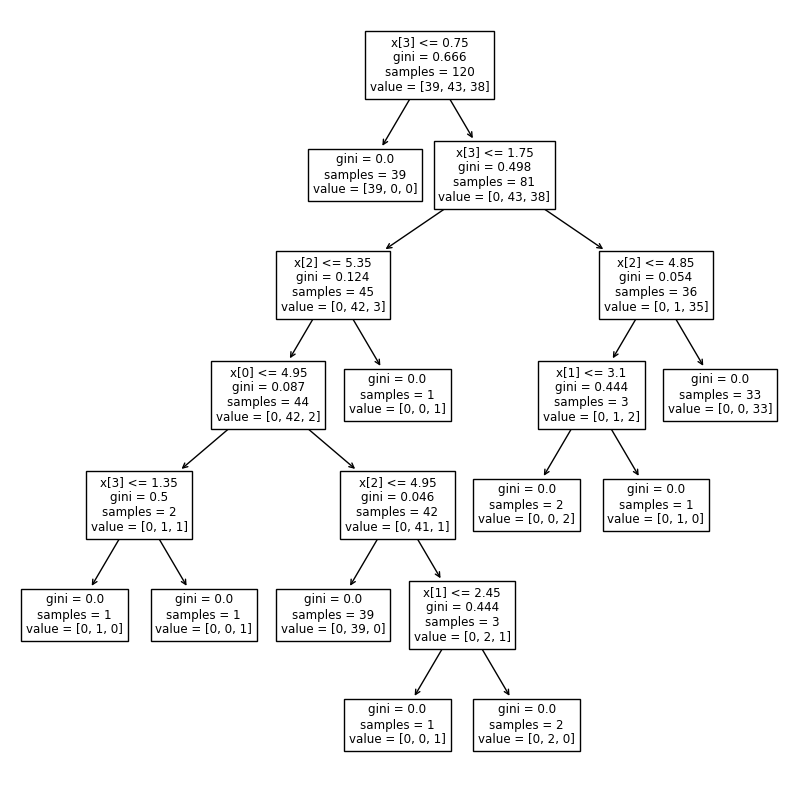

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


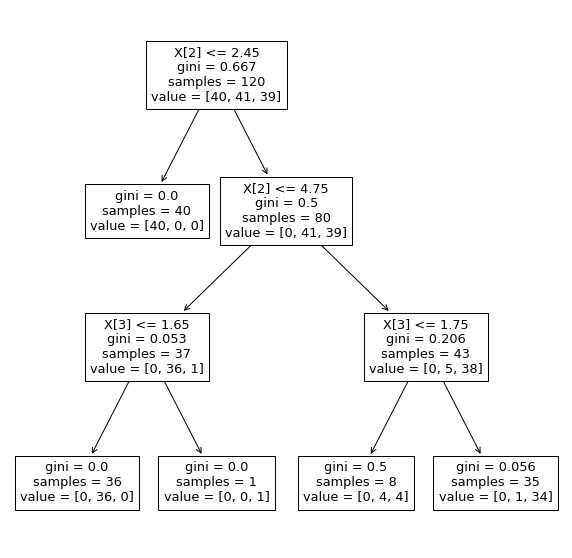

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


##machine_failure.csv

In [ ]:
import pandas as pd
df = pd.read_csv('machine_failure.csv')
df.head()

,id,type,temp_air,temp_process,speed,torque,tool_wear,is_failure
0,14860,M,298.1,308.6,1551,42.8,0,0
1,47181,L,298.2,308.7,1408,46.3,3,0
2,47182,L,298.1,308.5,1498,49.4,5,0
3,47183,L,298.2,308.6,1433,39.5,7,0
4,47184,L,298.2,308.7,1408,40.0,9,0


In [ ]:
from sklearn.model_selection import train_test_split # 데이터셋 분할

In [ ]:
df.isna().sum()

id              0
type            0
temp_air        0
temp_process    0
speed           0
torque          0
tool_wear       0
is_failure      0
dtype: int64

In [ ]:
df.select_dtypes(include='number').agg(["min","max","mean"])

,id,temp_air,temp_process,speed,torque,tool_wear,is_failure
min,14860.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.00000
max,57174.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.00000
mean,40704.791725,300.003556,310.004208,1538.865057,39.980535,107.929473,0.03306


In [ ]:
df["type"].value_counts()

type
L    5988
M    2995
H     999
Name: count, dtype: int64

In [ ]:
df_train, df_test = train_test_split(df,
                                     train_size=0.7,
                                     random_state=100,
                                     stratify=df["type"])
len(df_train), len(df_test)

(6987, 2995)

In [ ]:
df["type"].value_counts()

type
L    5988
M    2995
H     999
Name: count, dtype: int64

In [ ]:
df["type"].value_counts(normalize=True)

type
L    0.59988
M    0.30004
H    0.10008
Name: proportion, dtype: float64

In [ ]:
df_train["type"].value_counts(normalize=True)

type
L    0.599828
M    0.300129
H    0.100043
Name: proportion, dtype: float64

In [ ]:
df_test["type"].value_counts(normalize=True)

type
L    0.600000
M    0.299833
H    0.100167
Name: proportion, dtype: float64

##정규화
- standardScaler()

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

ls_drop_cols = ["id", "type", "is_failure"]
model_nor = StandardScaler().fit(df_train.drop(columns = ls_drop_cols))
arr_train_nor = model_nor.transform(df_train.drop(columns = ls_drop_cols))
arr_test_nor  = model_nor.transform(df_test.drop(columns = ls_drop_cols))

df_train_nor = pd.DataFrame(arr_train_nor,
                            columns = df_train.drop(columns = ls_drop_cols).columns)
df_test_nor = pd.DataFrame(arr_test_nor,
                           columns = df_test.drop(columns = ls_drop_cols).columns)

In [ ]:
df_train_nor.head()

,temp_air,temp_process,speed,torque,tool_wear
0,0.051047,1.012959,3.907686,-2.325164,0.229687
1,-0.597530,-0.741732,-0.797714,1.159299,-1.705543
2,-0.647421,-0.201827,-0.155025,0.058411,0.843297
3,-0.996655,-1.484101,-1.279730,0.785603,-1.406605
4,0.599844,0.540543,1.130352,-0.880879,-0.698594


In [ ]:
df_test_nor.head()

,temp_air,temp_process,speed,torque,tool_wear
0,1.048859,0.810495,0.349945,-0.214286,0.623027
1,0.001157,0.068126,-0.413248,0.088711,-0.761528
2,0.749515,0.608031,7.017840,-3.234155,-1.469540
3,-1.295998,-1.011684,-0.229623,-0.365785,-0.824463
4,1.098750,0.945471,-0.614088,0.310908,-1.249270


##데이터 통합


In [ ]:
df_train_bind = pd.concat([df_train[["id", "is_failure"]].reset_index(drop = True),
                           df_train_nor,
                           df_train_nor],
                          axis = 1)
df_test_bind = pd.concat([df_test[["id", "is_failure"]].reset_index(drop = True),
                          df_test_nor,
                          df_test_nor],
                         axis = 1)

In [ ]:
df_train_bind.head()

,id,is_failure,temp_air,temp_process,speed,torque,tool_wear,temp_air,temp_process,speed,torque,tool_wear
0,54990,0,0.051047,1.012959,3.907686,-2.325164,0.229687,0.051047,1.012959,3.907686,-2.325164,0.229687
1,47258,0,-0.597530,-0.741732,-0.797714,1.159299,-1.705543,-0.597530,-0.741732,-0.797714,1.159299,-1.705543
2,55522,0,-0.647421,-0.201827,-0.155025,0.058411,0.843297,-0.647421,-0.201827,-0.155025,0.058411,0.843297
3,31341,0,-0.996655,-1.484101,-1.279730,0.785603,-1.406605,-0.996655,-1.484101,-1.279730,0.785603,-1.406605
4,21144,0,0.599844,0.540543,1.130352,-0.880879,-0.698594,0.599844,0.540543,1.130352,-0.880879,-0.698594


In [ ]:
df_train_bind["Xgrp"] = "train"
df_test_bind["Xgrp"] = "test"
df_bind = pd.concat([df_train_bind, df_test_bind])
df_bind = df_bind.reset_index(drop = True)
df_bind.head(2)

,id,is_failure,temp_air,temp_process,speed,torque,tool_wear,temp_air,temp_process,speed,torque,tool_wear,Xgrp
0,54990,0,0.051047,1.012959,3.907686,-2.325164,0.229687,0.051047,1.012959,3.907686,-2.325164,0.229687,train
1,47258,0,-0.597530,-0.741732,-0.797714,1.159299,-1.705543,-0.597530,-0.741732,-0.797714,1.159299,-1.705543,train


# 펭귄 데이터 - 다중 분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q tfds-nightly

     |████████████████████████████████| 5.2 MB 4.5 MB/s 


In [ ]:
# 모듈 설치

import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)


TensorFlow version: 2.9.2
TensorFlow Datasets version:  4.8.0+nightly


In [ ]:
# 데이터 확인

ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/344 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/penguins/simple/1.0.0.incompleteETNUCU/penguins-train.tfrecord*...:   0%| …

Dataset penguins downloaded and prepared to /root/tensorflow_datasets/penguins/simple/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# 데이터 확인

print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


In [ ]:
# 펭귄 종 이름 확인

class_names = ['Adelie', 'Chinstrap', 'Gentoo']

In [ ]:
# 전처리된 데이터 셋 분리

ds_split, info = tfds.load("penguins/processed",
                           split=['train[:20%]', 'train[20%:]'],
                           as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)


In [ ]:
# 데이터 프레임

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(3), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(3), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1


In [ ]:
# 정규화된 특성과 종 레이블로 데이터 축소

features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

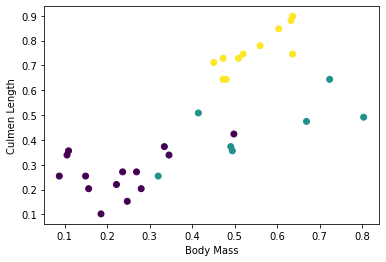

In [ ]:
# 클러스터로 시각화

plt.scatter(features[:,0], features[:,2], c=labels, cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()


In [ ]:
# 선형 모델

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [ ]:
# 모델 사용

predictions = model(features)
predictions[:5]
tf.nn.softmax(predictions[:5])

print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))


Prediction: [1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


In [ ]:
# 모델 훈련 - 손실함수와 경사함수 정의

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))



Loss test: 1.0613830089569092


In [ ]:
# 모델 최적화

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)


In [ ]:
# 옵티마이저 생성

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
# 단일 최적화

loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},  Loss: {}".format(optimizer.iterations.numpy(),loss(model, features, labels, training=True).numpy()))


Step: 0, Initial Loss: 1.0613830089569092
Step: 1,  Loss: 1.0571712255477905


In [ ]:
# 모델 훈련

train_loss_results = []
train_accuracy_results = []

num_epochs = 200

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.045, Accuracy: 54.307%
Epoch 050: Loss: 0.635, Accuracy: 80.150%
Epoch 100: Loss: 0.467, Accuracy: 81.648%
Epoch 150: Loss: 0.337, Accuracy: 94.382%


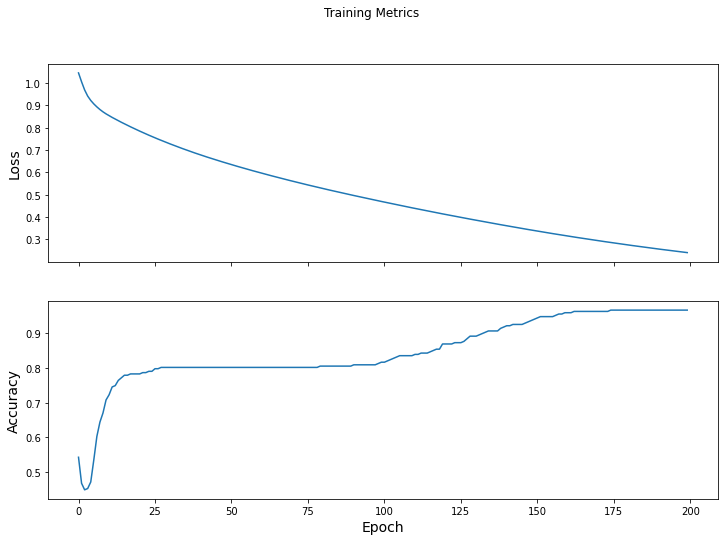

In [ ]:
# 손실함수 시각화

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
# 모델 평가

test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 97.015%


In [ ]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])>

In [ ]:
# 훈련된 모델로 예측

predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adelie (90.4%)
Example 1 prediction: Gentoo (82.2%)
Example 2 prediction: Chinstrap (70.1%)


## MNIST 데이터 학습

In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=15)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/15
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1986 - accuracy: 0.9413
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9762
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9840
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 10/15
1875

## fashion-MNIST 학습

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3744 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3106 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2794 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2473 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3483 - accuracy: 0.8753 - 554ms/epoch - 2ms/step

Test accuracy: 0.8752999901771545


In [ ]:
import zipfile
import os

# 압축 해제할 파일 경로
zip_path = '/content/shapes.zip'

# 압축 해제될 디렉토리 경로 (변경 가능)
extract_path = '/content/shapes'

# 디렉토리 생성 (없을 경우)
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('압축 해제 완료')


압축 해제 완료


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 생성기 인스턴스화
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 3)),  # 3 채널 이미지를 위한 입력 형태 조정
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 클래스가 3개이므로 뉴런 수를 3으로 설정
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 다중 분류를 위한 손실 함수 변경
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10
7/7 [==============================] - 1s 53ms/step - loss: 5.5738 - accuracy: 0.2692 - val_loss: 1.6805 - val_accuracy: 0.3125
Epoch 2/10
7/7 [==============================] - 0s 23ms/step - loss: 1.3090 - accuracy: 0.3510 - val_loss: 1.5057 - val_accuracy: 0.3125
Epoch 3/10
7/7 [==============================] - 0s 24ms/step - loss: 1.3360 - accuracy: 0.2692 - val_loss: 1.3999 - val_accuracy: 0.2188
Epoch 4/10
7/7 [==============================] - 0s 28ms/step - loss: 1.1436 - accuracy: 0.3365 - val_loss: 1.0994 - val_accuracy: 0.3125
Epoch 5/10
7/7 [==============================] - 0s 24ms/step - loss: 1.0994 - accuracy: 0.3077 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 6/10
7/7 [==============================] - 0s 23ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 7/10
7/7 [==============================] - 0s 22ms/step - loss: 1.0987 - accuracy: 0.3269 - val_loss: 1.0990 - val_accuracy: 0.2812
Epoch 8/10
7/7 [===========

In [ ]:
# 검증 데이터셋에 대한 모델 평가
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)


2/2 [==============================] - 0s 15ms/step - loss: 1.0986 - accuracy: 0.3333
Validation accuracy: 0.3333333432674408


## shapes attempt2

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=100, batch_size=16, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/100
8/8 [==============================] - 3s 126ms/step - loss: 1.6413 - accuracy: 0.3375 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 1s 66ms/step - loss: 1.1023 - accuracy: 0.3250 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 0s 57ms/step - loss: 1.1013 - accuracy: 0.2958 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 0s 57ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 58ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
8/8 [==============================] - 1s 69ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 0s 57ms/step - loss: 1.0987

KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/100
8/8 [==============================] - 3s 109ms/step - loss: 1.6146 - accuracy: 0.3125 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 64ms/step - loss: 1.1047 - accuracy: 0.3333 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 1s 58ms/step - loss: 1.0999 - accuracy: 0.3250 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 1s 61ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 59ms/step - loss: 1.0981 - accuracy: 0.3250 - val_loss: 1.0949 - val_accuracy: 0.4833
Epoch 6/100
8/8 [==============================] - 1s 61ms/step - loss: 1.0935 - accuracy: 0.4000 - val_loss: 1.0797 - val_accuracy: 0.4333
Epoch 7/100
8/8 [==============================] - 0s 59ms/step - loss: 1.0636

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 네 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')



Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/50
8/8 [==============================] - 3s 130ms/step - loss: 1.2836 - accuracy: 0.3125 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 61ms/step - loss: 1.1027 - accuracy: 0.3000 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 60ms/step - loss: 1.1002 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 62ms/step - loss: 1.0988 - accuracy: 0.2750 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 61ms/step - loss: 1.1003 - accuracy: 0.3458 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 61ms/step - loss: 1.0990 - accuracy: 0.2917 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 75ms/step - loss: 1.0991 - accu

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 다섯 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 여섯 번째 컨볼루션 블록
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper_and_wider.h5')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


ValueError: ignored

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 데이터 로드 및 전처리
data_dir = '/content/shapes/shapes'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 세 번째 컨볼루션 블록
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 네 번째 컨볼루션 블록
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 네 번째 컨볼루션 블록
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=50, batch_size=48, validation_data=validation_generator)

# 모델 저장 (선택적)
model.save('shapes_model_deeper.h5')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/50
8/8 [==============================] - 3s 97ms/step - loss: 1.4785 - accuracy: 0.2792 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 75ms/step - loss: 1.1017 - accuracy: 0.3292 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 83ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 73ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 80ms/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 61ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 62ms/step - loss: 1.0986 - accur